<a href="https://colab.research.google.com/github/Joeksef/Bank-Fraud-Detection/blob/main/Bank_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Fraud detection by Kolawole Joseph E**

In [ ]:
# Dataset Description
"""
label                 Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}
msisdn	              mobile number of user
aon	                  age on cellular network in days
daily_decr30	        Daily amount spent from main account, averaged over last 30 days
daily_decr90	        Daily amount spent from main account, averaged over last 90 days
rental30	            Average main account balance over last 30 days
rental90	            Average main account balance over last 90 days
last_rech_date_ma	    Number of days till last recharge of main account
last_rech_date_da	    Number of days till last recharge of data account
last_rech_amt_ma	    Amount of last recharge of main account
cnt_ma_rech30	        Number of times main account got recharged in last 30 days
fr_ma_rech30	        Frequency of main account recharged in last 30 days
sumamnt_ma_rech30	    Total amount of recharge in main account over last 30 days
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level
cnt_ma_rech90	        Number of times main account got recharged in last 90 days
fr_ma_rech90	        Frequency of main account recharged in last 90 days
sumamnt_ma_rech90	    Total amount of recharge in main account over last 90 days
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level
cnt_da_rech30	        Number of times data account got recharged in last 30 days
fr_da_rech30	        Frequency of data account recharged in last 30 days
cnt_da_rech90	        Number of times data account got recharged in last 90 days
fr_da_rech90	        Frequency of data account recharged in last 90 days
cnt_loans30	          Number of loans taken by user in last 30 days
amnt_loans30	        Total amount of loans taken by user in last 30 days
maxamnt_loans30	      maximum amount of loan taken by the user in last 30 days There are only two options: 5 & 10 INR, for                           which the user needs to pay back 6 & 12 INR respectively
medianamnt_loans30	  Median of amounts of loan taken by the user in last 30 days
cnt_loans90	          Number of loans taken by user in last 90 days
amnt_loans90	        Total amount of loans taken by user in last 90 days
maxamnt_loans90	      maximum amount of loan taken by the user in last 90 days
medianamnt_loans90	  Median of amounts of loan taken by the user in last 90 days
payback30	            Average payback time in days over last 30 days
payback90	            Average payback time in days over last 90 days
pcircle	              telecom circle
pdate	                date
"""

'\nlabel                 Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}\nmsisdn\t              mobile number of user\naon\t                  age on cellular network in days\ndaily_decr30\t        Daily amount spent from main account, averaged over last 30 days\ndaily_decr90\t        Daily amount spent from main account, averaged over last 90 days\nrental30\t            Average main account balance over last 30 days\nrental90\t            Average main account balance over last 90 days\nlast_rech_date_ma\t    Number of days till last recharge of main account\nlast_rech_date_da\t    Number of days till last recharge of data account\nlast_rech_amt_ma\t    Amount of last recharge of main account\ncnt_ma_rech30\t        Number of times main account got recharged in last 30 days\nfr_ma_rech30\t        Frequency of main account recharged in last 30 days\nsumamnt_ma_rech30\t    Total amount of recharge in main account over l

In [ ]:
!pip install imblearn  

In [ ]:
!pip install termcolor

In [ ]:
!pip install xgboost

In [ ]:
# IMPORTING NECESSARY LIBRARIES AND MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # for normalizing data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier # Isolation Forest and Random forest tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score , r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier # XGBoost algorithm
from termcolor import colored as cl # for customizing text
from collections import Counter
import itertools # advanced tools


In [ ]:
# Uncomment in Jupyter Notebook but comment it in Google Colab
"""
df = pd.read_csv("Bank_dataset.csv")

"""

'\ndf = pd.read_csv("Bank_dataset.csv")\n\n'

In [ ]:
# Comment this in Jupyter Notebook but uncomment it in Google Colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Comment this in Jupyter Notebook but uncomment it in Google Colab
path = "/content/drive/MyDrive/Projects/Bank_dataset.csv"
df = pd.read_csv(path)

NameError: ignored

In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535,1398,1398,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241,21.228,21.228,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947,150.6193333,150.6193333,1098.9,1098.9,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [ ]:
#Droping the second column since its of no use to the dataset, to avoid data that will affect Model precision
df.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)

In [ ]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (190001, 36)


In [ ]:
      df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190001 entries, 0 to 190000
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   msisdn                190001 non-null  object 
 2   aon                   190001 non-null  object 
 3   daily_decr30          190001 non-null  object 
 4   daily_decr90          190001 non-null  object 
 5   rental30              190001 non-null  object 
 6   rental90              190001 non-null  object 
 7   last_rech_date_ma     190001 non-null  float64
 8   last_rech_date_da     190001 non-null  float64
 9   last_rech_amt_ma      190001 non-null  int64  
 10  cnt_ma_rech30         190001 non-null  int64  
 11  fr_ma_rech30          190001 non-null  float64
 12  sumamnt_ma_rech30     190001 non-null  float64
 13  medianamnt_ma_rech30  190001 non-null  float64
 14  medianmarechprebal30  190001 non-null  float64
 15  

In [ ]:
df.index

RangeIndex(start=0, stop=190001, step=1)

In [ ]:
df.describe()

,label,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000
mean,0.875069,3735.346070,3731.710966,2065.118510,3.976926,3709.413953,7704.611360,1814.503916,3842.143205,6.314546,7.722838,12398.741633,1865.643265,92.215857,264.870805,3801.312382,0.041331,0.045721,2.758138,17.945621,276.634790,0.054160,18.364699,23.639181,6.701870,0.046289,3.401179,4.322936
std,0.330641,53814.346634,53558.030669,2375.847873,4.266573,53412.173826,10184.588317,2077.810950,53934.213470,7.210859,12.604832,16930.067984,2086.096739,367.153824,4202.457509,54312.648067,0.396700,0.946489,2.555767,17.390373,4267.364414,0.218396,223.312555,26.503844,2.102752,0.201153,8.836749,10.318272
min,0.000000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.870000,4.000000,2.000000,7209.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,7.000000,0.000000,2309.000000,5.000000,6.000000,10008.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.300000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,997717.809600,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99842.336330,999809.240100,38.000000,57.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [ ]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

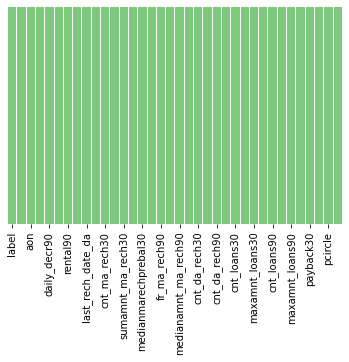

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Accent')

In [ ]:
# Count the occurrences of fraud and no fraud and print them
fraud_flag = df['label'].value_counts()
fraud_flag

1    166264
0     23737
Name: label, dtype: int64

In [ ]:
# Printing the ratio of fraud cases
fraud_ratio_cases = fraud_flag/len(df.index)
print(f'Ratio of fraudulent cases: {fraud_ratio_cases[0]}\nRatio of non-fraudulent cases: {fraud_ratio_cases[1]}')

Ratio of fraudulent cases: 0.12493092141620307
Ratio of non-fraudulent cases: 0.8750690785837969


In [ ]:
# Determine number of fraud cases in dataset
Fraud = df[df['label'] == 0]
Valid = df[df['label'] == 1]
outlier_fraction = len(Fraud)/float(len(Valid))
print('Outlier frction: {}'.format(outlier_fraction))
print('Fraud Cases: {}'.format(len(df[df['label'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['label'] == 0])))

Outlier frction: 0.14276692489053552
Fraud Cases: 166264
Valid Transactions: 23737


In [ ]:
refunded = len(df[df.label == 1])
not_refunded = len(df[df.label == 0])
fraud_percent = (not_refunded / (not_refunded + refunded)) * 100
print("Number of refunded loan: ", refunded)
print("Number of loan not refunded: ", not_refunded)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent),"%")

Number of refunded loan:  166264
Number of loan not refunded:  23737
Percentage of Fraud transactions: 12.4931 %


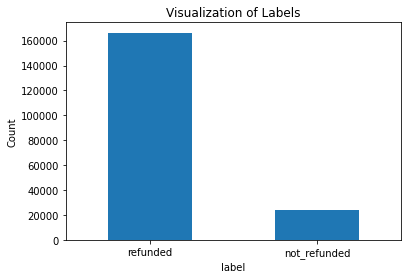

In [ ]:

labels = ["refunded", "not_refunded"]
count_classes = df.value_counts(df['label'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
corr = df.corr()
corr.shape

(28, 28)

In [ ]:
corr

,label,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.003078,0.002682,0.130805,0.236859,0.000507,0.202064,0.140745,-0.004101,0.235895,0.083986,0.205036,0.119931,0.038814,0.003570,-0.000746,0.002973,-0.005697,0.196452,0.197388,0.000295,0.044759,0.004201,0.199722,0.084151,0.036027,0.048064,0.048983
last_rech_date_ma,0.003078,1.000000,0.001002,0.000102,0.004945,-0.001243,0.002749,-0.001099,0.005041,0.005222,0.000155,0.003289,-0.000597,-0.002470,-0.003380,-0.003519,-0.003736,-0.002295,0.002420,0.002083,0.000535,0.002246,0.000326,0.002368,-0.000835,0.003654,-0.001790,-0.001634
last_rech_date_da,0.002682,0.001002,1.000000,0.000353,0.000989,-0.000790,-0.000748,0.001272,0.003624,0.000578,0.000512,-0.001206,0.000310,0.004765,-0.003585,0.000321,-0.001538,0.000101,-0.000224,-0.000086,0.000943,0.000044,-0.002847,0.000055,0.001906,-0.002535,0.000313,0.000870
last_rech_amt_ma,0.130805,0.000102,0.000353,1.000000,-0.002352,0.002028,0.439998,0.795247,-0.001917,0.016989,0.106602,0.417695,0.818428,0.124861,-0.001642,-0.003942,0.015144,0.016966,-0.027524,0.008792,0.001117,0.028081,-0.000060,0.014030,0.148354,0.021031,-0.027908,-0.015397
cnt_ma_rech30,0.236859,0.004945,0.000989,-0.002352,1.000000,0.000788,0.656250,-0.011852,0.000891,0.886726,-0.152642,0.583667,-0.051056,0.014651,0.002549,-0.003478,0.010757,0.007645,0.765105,0.751609,0.000545,-0.067176,0.014765,0.684428,0.174136,-0.071337,0.043171,0.017087
fr_ma_rech30,0.000507,-0.001243,-0.000790,0.002028,0.000788,1.000000,-0.000216,-0.001525,0.002093,0.000467,-0.001395,-0.001307,-0.001959,-0.002998,-0.000119,-0.001417,0.001011,-0.001771,0.001674,0.001361,-0.002040,0.000086,0.004300,0.001763,-0.002195,-0.001451,0.000499,-0.000079
sumamnt_ma_rech30,0.202064,0.002749,-0.000748,0.439998,0.656250,-0.000216,1.000000,0.488314,0.000794,0.595742,-0.070755,0.890344,0.422104,0.094397,0.002738,-0.001678,0.017686,0.017503,0.490497,0.529878,0.001924,-0.034840,0.009468,0.483161,0.258299,-0.042354,-0.000140,-0.012756
medianamnt_ma_rech30,0.140745,-0.001099,0.001272,0.795247,-0.011852,-0.001525,0.488314,1.000000,-0.000585,0.005257,0.150315,0.448507,0.866292,0.163194,0.000283,-0.001990,0.015872,0.013749,-0.029985,0.007135,0.002496,0.032033,-0.001084,0.014433,0.159891,0.022367,-0.018504,-0.003251
medianmarechprebal30,-0.004101,0.005041,0.003624,-0.001917,0.000891,0.002093,0.000794,-0.000585,1.000000,0.001936,-0.001742,0.000270,-0.001265,0.000754,-0.003515,-0.000566,-0.002911,-0.001212,0.001205,0.001748,-0.001960,-0.002895,0.002048,0.002117,-0.001831,-0.002306,0.000941,0.001317
cnt_ma_rech90,0.235895,0.005222,0.000578,0.016989,0.886726,0.000467,0.595742,0.005257,0.001936,1.000000,-0.148927,0.686078,-0.035236,0.016447,0.002854,-0.003518,0.002804,0.003641,0.688916,0.707510,-0.000091,-0.054278,0.016373,0.783033,0.244171,-0.072572,0.011654,-0.003448


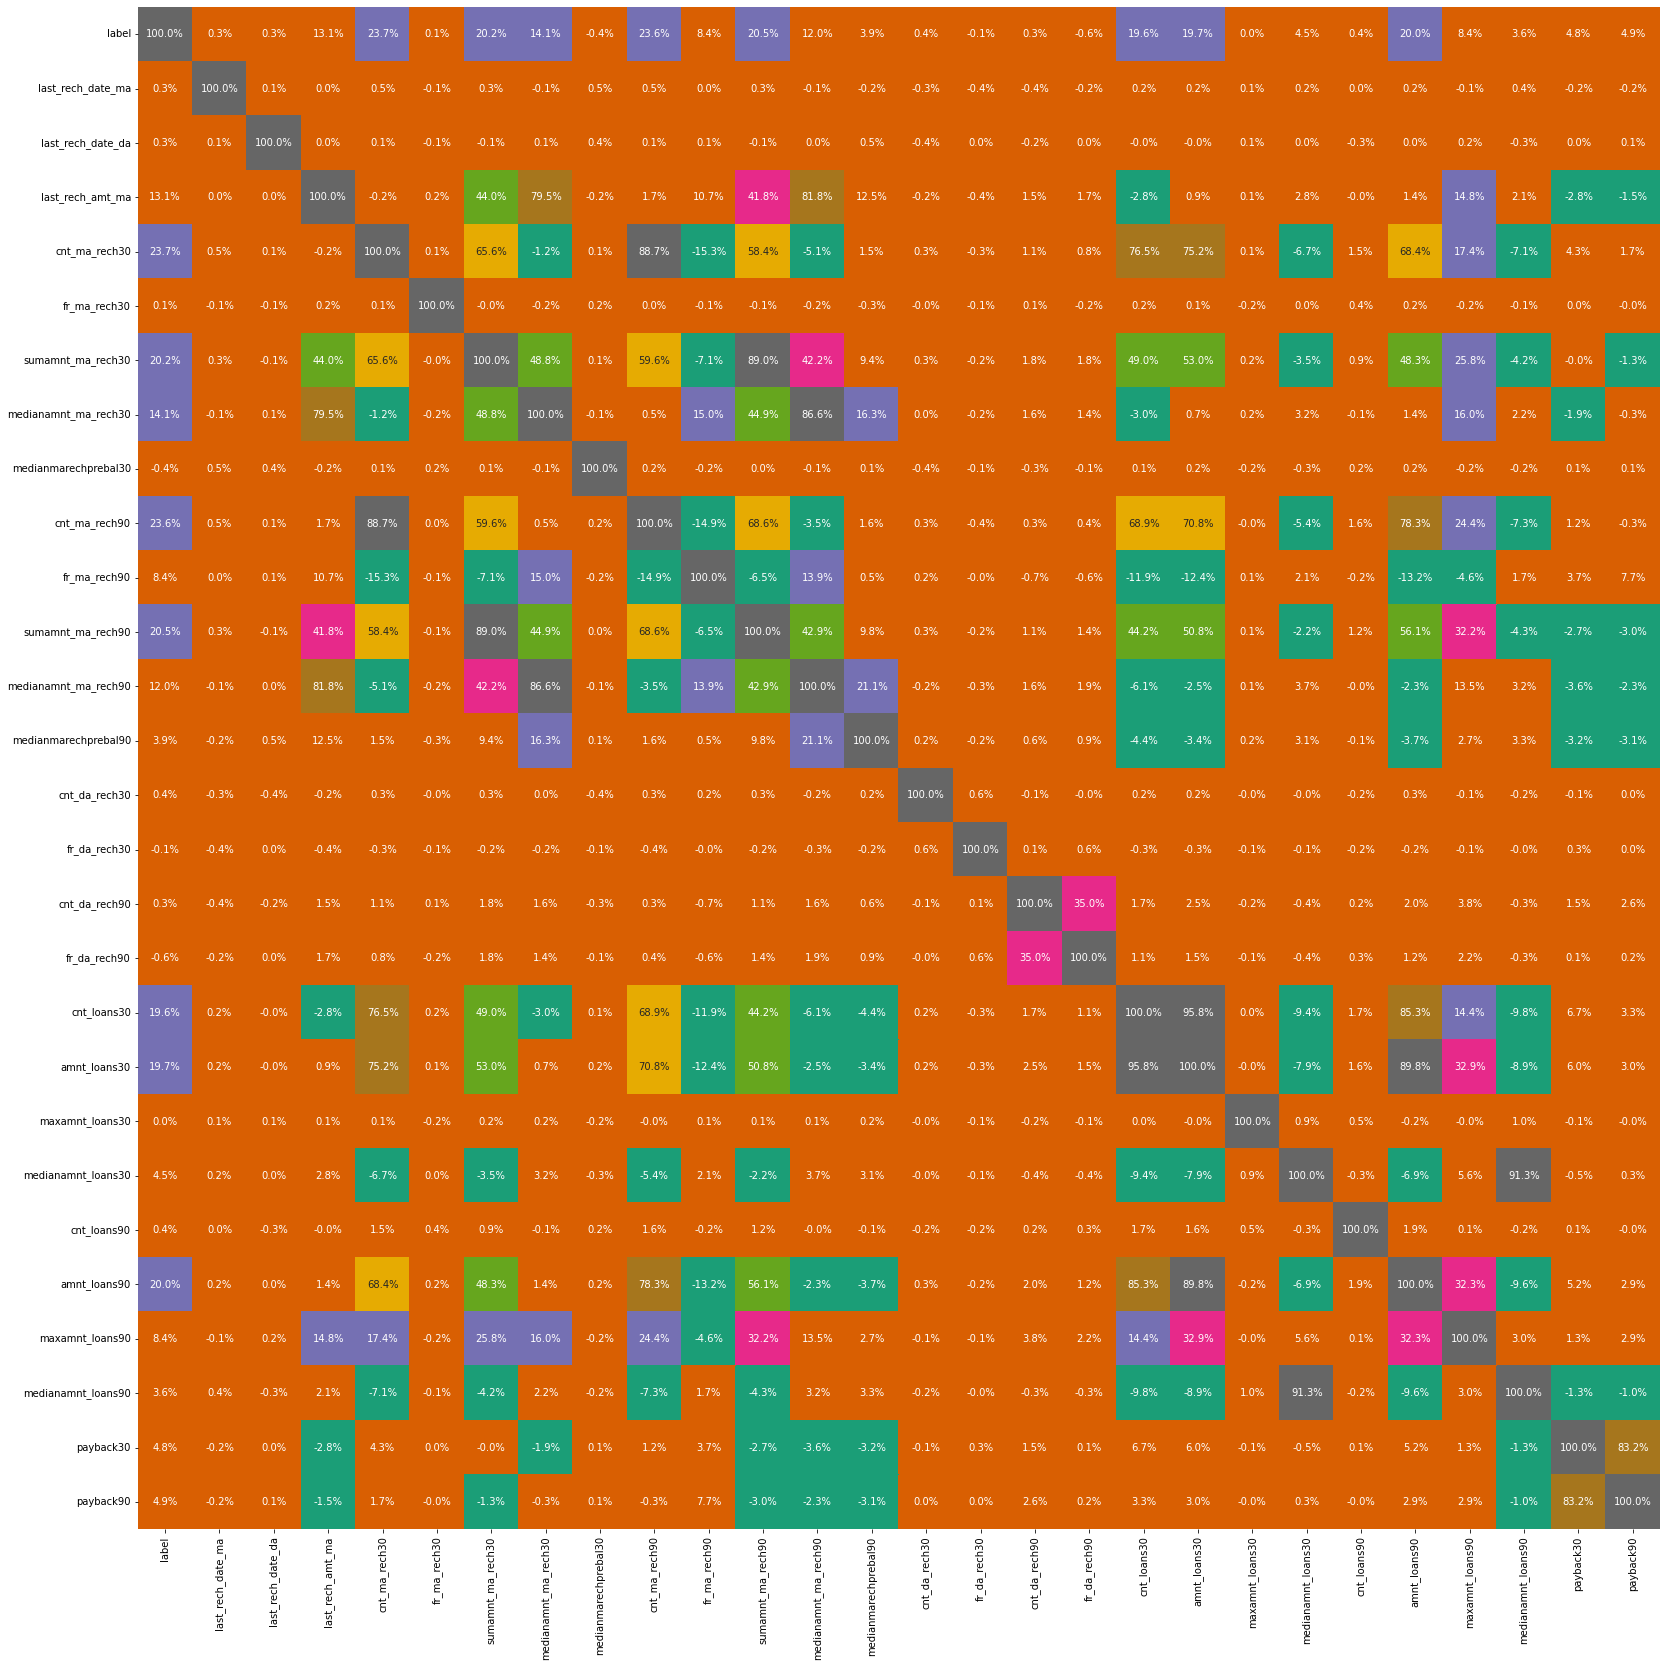

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(28, 28))
sns.heatmap(corr, cbar=False, square= True, fmt= '0.1%', annot=True, cmap= 'Dark2')

In [ ]:
X = df.drop(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'pcircle', 'pdate'], axis = 1)
y = df.label
print(X.shape)
print(y.shape)

(190001, 27)
(190001,)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190001 entries, 0 to 190000
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   last_rech_date_ma     190001 non-null  float64
 1   last_rech_date_da     190001 non-null  float64
 2   last_rech_amt_ma      190001 non-null  int64  
 3   cnt_ma_rech30         190001 non-null  int64  
 4   fr_ma_rech30          190001 non-null  float64
 5   sumamnt_ma_rech30     190001 non-null  float64
 6   medianamnt_ma_rech30  190001 non-null  float64
 7   medianmarechprebal30  190001 non-null  float64
 8   cnt_ma_rech90         190001 non-null  int64  
 9   fr_ma_rech90          190001 non-null  int64  
 10  sumamnt_ma_rech90     190001 non-null  int64  
 11  medianamnt_ma_rech90  190001 non-null  float64
 12  medianmarechprebal90  190001 non-null  float64
 13  cnt_da_rech30         190001 non-null  float64
 14  fr_da_rech30          190001 non-null  float64
 15  

In [ ]:
#separating training dataset from test dataset with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
# Printing the shape of the splitted dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(152000, 27)
(152000,)
(38001, 27)
(38001,)


In [ ]:
# Printing the length of the splitted dataset
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 152000
Length of X_test is: 38001
Length of y_train is: 152000
Length of y_test is: 38001


# MODELING

### Random Forest Model and Scores

In [ ]:
# Define the model as the random forest
rf_model = RandomForestClassifier(random_state=5, n_estimators=100)
# Fit the model to our training set
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
rf_model_pred = rf_model.predict(X_test)
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is: {}'.format(accuracy_score(y_test, rf_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is: {}'.format(f1_score(y_test, rf_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the Random Forest Tree model is: {}'.format(r2_score(y_test, rf_model_pred)), attrs = ['bold'], color = 'green'))

0.9546578947368421
ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is: 0.8692929133443856
F1 SCORE
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is: 0.9289260928668528
R^2 SCORE
------------------------------------------------------------------------
R^2 score of the Random Forest Tree model is: -0.19334093375392847


In [ ]:
# Printing the classifcation report and confusion matrix for Random Forest
print('Classification report:\n', classification_report(y_test, rf_model_pred))
rf_conf_mat = confusion_matrix(y_test, rf_model_pred)
print('Random Forest Confusion matrix:\n', rf_conf_mat)


Classification report:
               precision    recall  f1-score   support

           0       0.43      0.12      0.19      4789
           1       0.88      0.98      0.93     33212

    accuracy                           0.87     38001
   macro avg       0.66      0.55      0.56     38001
weighted avg       0.83      0.87      0.84     38001

Random Forest Confusion matrix:
 [[  567  4222]
 [  762 32450]]


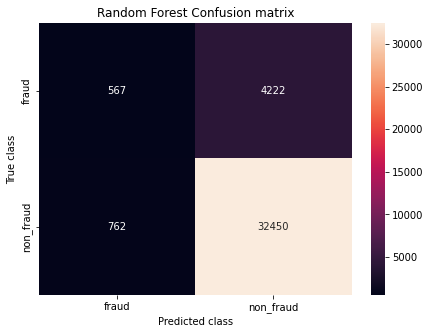

In [ ]:
#Visualizing the Random Forest confusion matrix
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(rf_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Logistic Regression Model and Scores

In [ ]:
# Fit a logistic regression model to our data
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

# Obtain model predictions
lr_model_pred = lr_model.predict(X_test)
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is: {}'.format(accuracy_score(y_test, lr_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is: {}'.format(f1_score(y_test, lr_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the Logistic Regression model is: {}'.format(r2_score(y_test, lr_model_pred)), attrs = ['bold'], color = 'green'))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is: 0.8740033157022183
F1 SCORE
------------------------------------------------------------------------
F1 score of the Logistic Regression model is: 0.9327641408751334
R^2 SCORE
------------------------------------------------------------------------
R^2 score of the Logistic Regression model is: -0.14395594786488686


In [ ]:
# Print the classifcation report and confusion matrix Logistic Regression
print('Classification report:\n', classification_report(y_test, lr_model_pred))
lr_conf_mat = confusion_matrix(y_test, lr_model_pred)
print('Logistic Regression Confusion matrix:\n', lr_conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      4789
           1       0.87      1.00      0.93     33212

    accuracy                           0.87     38001
   macro avg       0.94      0.50      0.47     38001
weighted avg       0.89      0.87      0.82     38001

Logistic Regression Confusion matrix:
 [[    1  4788]
 [    0 33212]]


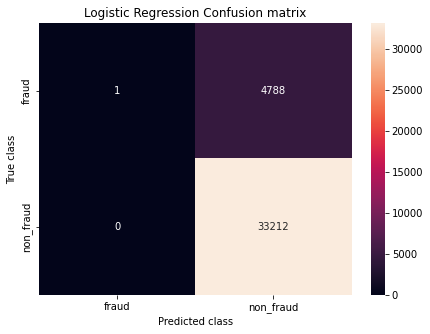

In [ ]:
#Visualizing the Logistic Regression confusion matrix
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(lr_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Logistic Regression Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Decision Tree Classifier Model and Scores

In [ ]:
# Building decision tree
# 1. Decision Tree
dt_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt_model.fit(X_train, y_train)
dt_model_pred = dt_model.predict(X_test)
def decision_tree_classification(X_train, y_train, X_test, y_test):
    # initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier()
    # train model by using fit method
    print("Model training starts........")
    dt_classifier.fit(X_train, y_train.values.ravel())
    print("Model training completed")
    acc_score = dt_classifier.score(X_train, y_train)
    print(f'Accuracy of model on test dataset : {acc_score}')
    # predict result using test dataset
    dt_model_pred = dt_classifier.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix : \n {confusion_matrix(y_test, dt_model_pred)}")
    # classification report for f1-score
    print(f"Classification Report : \n {classification_report(y_test, dt_model_pred)}")

# calling decision_tree_classification method to train and evaluate model
decision_tree_classification(X_train, y_train, X_test, y_test)

Model training starts........
Model training completed
Accuracy of model on test dataset : 0.9550131578947368
Confusion Matrix : 
 [[  882  3907]
 [ 2667 30545]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.25      0.18      0.21      4789
           1       0.89      0.92      0.90     33212

    accuracy                           0.83     38001
   macro avg       0.57      0.55      0.56     38001
weighted avg       0.81      0.83      0.82     38001



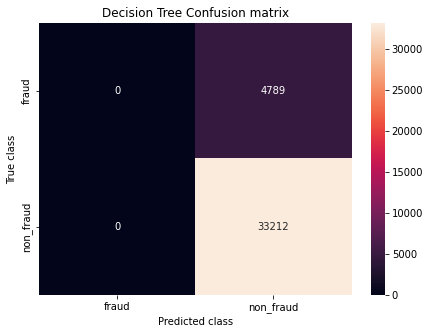

In [ ]:
#Visualizing the Decision Tree confusion matrix
LABELS = ['fraud', 'non_fraud']
dt_conf_mat = confusion_matrix(y_test, dt_model_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(dt_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Decision Tree Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# K-Nearest Neighbors
n = 5
knn_model = KNeighborsClassifier(n_neighbors = n)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is: {}'.format(accuracy_score(y_test, knn_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is: {}'.format(f1_score(y_test, knn_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the KNN model is: {}'.format(r2_score(y_test, knn_model_pred)), attrs = ['bold'], color = 'green'))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the KNN model is: 0.8626878240046315
F1 SCORE
------------------------------------------------------------------------
F1 score of the KNN model is: 0.9217878769710415
R^2 SCORE
------------------------------------------------------------------------
R^2 score of the KNN model is: -0.24669217543002908


In [ ]:
# Printing the classifcation report and confusion matrix for KNN
print('Classification report:\n', classification_report(y_test, knn_model_pred))
knn_conf_mat = confusion_matrix(y_test, knn_model_pred)
print('KNN Confusion matrix:\n', knn_conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.42      0.44      4789
           1       0.92      0.93      0.92     33212

    accuracy                           0.86     38001
   macro avg       0.69      0.68      0.68     38001
weighted avg       0.86      0.86      0.86     38001

KNN Confusion matrix:
 [[ 2034  2755]
 [ 2463 30749]]


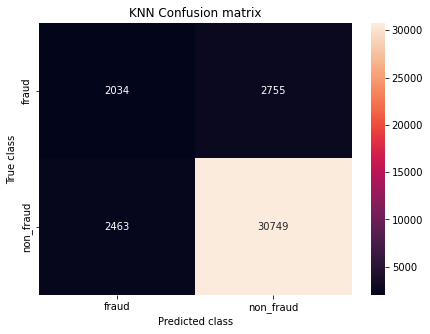

In [ ]:
#Visualizing the Random Forest confusion matrix
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(knn_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("KNN Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# SVM 
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_model_pred = svm_model.predict(X_test)
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is: {}'.format(accuracy_score(y_test, svm_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is: {}'.format(f1_score(y_test, svm_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the SVM model is: {}'.format(r2_score(y_test, svm_model_pred)), attrs = ['bold'], color = 'green'))

In [ ]:
# Printing the classifcation report and confusion matrix for SVM
print('Classification report:\n', classification_report(y_test, svm_model_pred))
svm_conf_mat = confusion_matrix(y_test, svm_model_pred)
print('SVM Confusion matrix:\n', svm_conf_mat)

In [ ]:
#Visualizing the Random Forest confusion matrix
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(svm_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("SVM Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# XGBoost

xgb_model = XGBClassifier(max_depth = 4)
xgb_model.fit(X_train, y_train)
xgb_model_pred = xgb_model.predict(X_test)

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is: {}'.format(accuracy_score(y_test, xgb_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is: {}'.format(f1_score(y_test, xgb_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the XGBoost model is: {}'.format(r2_score(y_test, xgb_model_pred)), attrs = ['bold'], color = 'green'))

In [ ]:
# Printing the classifcation report and confusion matrix for XGBoost
print('Classification report:\n', classification_report(y_test, xgb_model_pred))
xgb_conf_mat = confusion_matrix(y_test, xgb_model_pred)
print('XGBoost Confusion matrix:\n', knn_conf_mat)

In [ ]:
#Visualizing the Random Forest confusion matrix
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(xgb_conf_mat, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("XGBoost Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Addressing Label-Imbalance issue using The Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
value_counts = Counter(y_resampled)
print(value_counts)
(train_X, test_X, train_y, test_y) = train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state= 42)
print("Resampled shape of X_train: ", train_X.shape)
print("Resampled shape of X_test: ", test_X.shape)
print("Resampled shape of y_train: ", train_y.shape)
print("Resampled shape of y_test: ", test_X.shape)

Resampled shape of X:  (332528, 27)
Resampled shape of Y:  (332528,)
Counter({0: 166264, 1: 166264})
Resampled shape of X_train:  (266022, 27)
Resampled shape of X_test:  (66506, 27)
Resampled shape of y_train:  (266022,)
Resampled shape of y_test:  (66506, 27)


### Random Forest Classifier Model and Scores for the resampled data



In [ ]:
# Define the model as the random forest
rf_resampled_model = RandomForestClassifier(random_state=5, n_estimators=100)
# Fit a logistic regression model to the resampled data
rf_resampled_model.fit(train_X, train_y)
print(rf_resampled_model.score(train_X, train_y))
rf_resampled_model_pred = rf_resampled_model.predict(test_X)
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is: {}'.format(accuracy_score(test_y, rf_resampled_model_pred)), attrs = ['bold'], color = 'red'))
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is: {}'.format(f1_score(test_y, rf_resampled_model_pred)), attrs = ['bold'], color = 'blue'))
print(cl('R^2 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('R^2 score of the Random Forest Tree model is: {}'.format(r2_score(test_y, rf_resampled_model_pred)), attrs = ['bold'], color = 'green'))

0.9705437896113855
ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is: 0.9147445343277298
F1 SCORE
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is: 0.9135934166412679
R^2 SCORE
------------------------------------------------------------------------
R^2 score of the Random Forest Tree model is: 0.658975856336762


In [ ]:
# Printing the classifcation report and confusion matrix for Random Forest 
print('Classification report:\n', classification_report(test_y, rf_resampled_model_pred))
rf_resampled_conf_mat = confusion_matrix(test_y, rf_resampled_model_pred)
print('Random Forest Confusion matrix:\n', rf_resampled_conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     33167
           1       0.93      0.90      0.91     33339

    accuracy                           0.91     66506
   macro avg       0.92      0.91      0.91     66506
weighted avg       0.92      0.91      0.91     66506

Random Forest Confusion matrix:
 [[30861  2306]
 [ 3364 29975]]


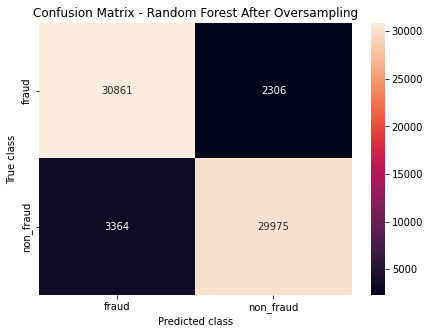

In [ ]:
#Visualizing the Random Forest confusion matrix for the Resampled data
LABELS = ['fraud', 'non_fraud']
plt.figure(figsize=(7, 5))
sns.heatmap(rf_resampled_conf_mat, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion Matrix - Random Forest After Oversampling")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Decision Tree Classifier Model and Scores after Resampling

In [ ]:
# Building decision tree
# 1. Decision Tree
dt_resampled_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt_resampled_model.fit(train_X, train_y)
dt_resampled_model_pred = dt_resampled_model.predict(test_X)
def decision_tree_classification(train_X, train_y, test_X, test_y):
    # initialize object for DecisionTreeClassifier class
    dt_classifier_resampled = DecisionTreeClassifier()
    # train model by using fit method
    print("Model training starts........")
    dt_classifier_resampled.fit(train_X, train_y.values.ravel())
    print("Model training completed")
    accuracy_score = dt_classifier_resampled.score(X_train, y_train)
    print(f'Accuracy of model on test dataset : {accuracy_score}')
    # predict result using test dataset
    dt_resampled_model_pred = dt_classifier_resampled.predict(test_X)
    # confusion matrix
    print(f"Confusion Matrix : \n {confusion_matrix(test_y, dt_resampled_model_pred)}")
    # classification report for f1-score
    print(f"Classification Report : \n {classification_report(test_y, dt_resampled_model_pred)}")

# calling decision_tree_classification method to train and evaluate model
decision_tree_classification(train_X, train_y, test_X, test_y)

Model training starts........
Model training completed
Accuracy of model on test dataset : 0.9268815789473684
Confusion Matrix : 
 [[30383  2784]
 [ 4875 28464]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     33167
           1       0.91      0.85      0.88     33339

    accuracy                           0.88     66506
   macro avg       0.89      0.88      0.88     66506
weighted avg       0.89      0.88      0.88     66506



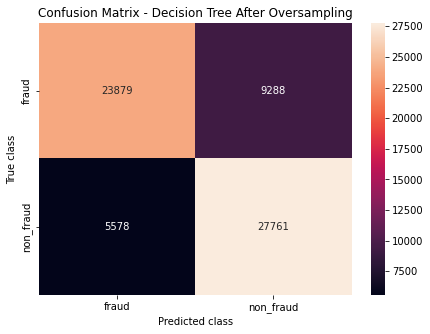

In [ ]:
#Visualizing the Decision Tree confusion matrix for the Resampled data
LABELS = ['fraud', 'non_fraud']
cm_resampled = confusion_matrix(test_y, dt_resampled_model_pred)
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(test_y, dt_resampled_model_pred), xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion Matrix - Decision Tree After Oversampling")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()